# Preamble
This data was extracted from the 1994 Census United States bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). This dataset task is to determine accurately whether a person makes over $50K a year.

This task includes the following steps :
1. Importing Data
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Building Model
5. Model Evaluation
6. Conclusion

I hope I can make it as thorough and understandable as possible for the readers. I am open to suggestion to improve this notebook. 

Please contact me at : darmawanfariz@gmail.com

Thanks.


# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

C:\Users\Pavilion\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
print('This dataframe contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

This dataframe contains 32561 rows and 15 columns


Explanation about each columns :
-	age = The person’s age
-	workclass = Type of work (Federal Gov, Unemployed, etc)
-	fnlwgt = The number of units in the target population that the responding unit represents
- education = Types of unit's education
-	education.num = number of years of education in total, which is a continuous representation of the discrete variable education
-	marital.status = describe the unit’s relationship with significant other
-	occupation = type of job
-	relationship = the unit’s role in the family
-	race = the unit’s race
-	sex = the unit’s gender
-	capital_gain and capital_loss = loss/income from investment sources other than wage/salary
-	hours.per.week = unit’s total amount of work time per week
-	native.country = unit’s origin country
-	income = unit’s income (target variable)

<b>Description of fnlwgt (final weight)</b>

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.

- Controls for Hispanic Origin by age and sex.

- Controls by Race, age and sex.

They use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end they come back to all the controls they used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Data Cleaning

In [5]:
#Renaming columns
columns_rename = {
    'age' : 'Age',
    'workclass' : 'Workclass',
    'fnlwgt' : 'Final Weight',
    'education' : 'Education',
    'education.num' : 'Years of Education',
    'marital.status' : 'Marital Status',
    'occupation' : 'Occupation',
    'relationship' : 'Role in Family',
    'race' : 'Race',
    'sex' : 'Gender',
    'capital.gain' : 'Capital Gain',
    'capital.loss' : 'Capital Loss',
    'hours.per.week' : 'Workhours per Week',
    'native.country' : 'Native Country',
    'income' : 'Income'
}
df.rename(columns = columns_rename, inplace=True)

<b> Detecting Duplicate Data

In [6]:
df[df.duplicated(subset=None, keep=False) == True].head()

,Age,Workclass,Final Weight,Education,Years of Education,Marital Status,Occupation,Role in Family,Race,Gender,Capital Gain,Capital Loss,Workhours per Week,Native Country,Income
6227,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
7615,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
7978,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8356,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [7]:
df = df.drop_duplicates(keep = 'first')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 32537 non-null  int64 
 1   Workclass           32537 non-null  object
 2   Final Weight        32537 non-null  int64 
 3   Education           32537 non-null  object
 4   Years of Education  32537 non-null  int64 
 5   Marital Status      32537 non-null  object
 6   Occupation          32537 non-null  object
 7   Role in Family      32537 non-null  object
 8   Race                32537 non-null  object
 9   Gender              32537 non-null  object
 10  Capital Gain        32537 non-null  int64 
 11  Capital Loss        32537 non-null  int64 
 12  Workhours per Week  32537 non-null  int64 
 13  Native Country      32537 non-null  object
 14  Income              32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


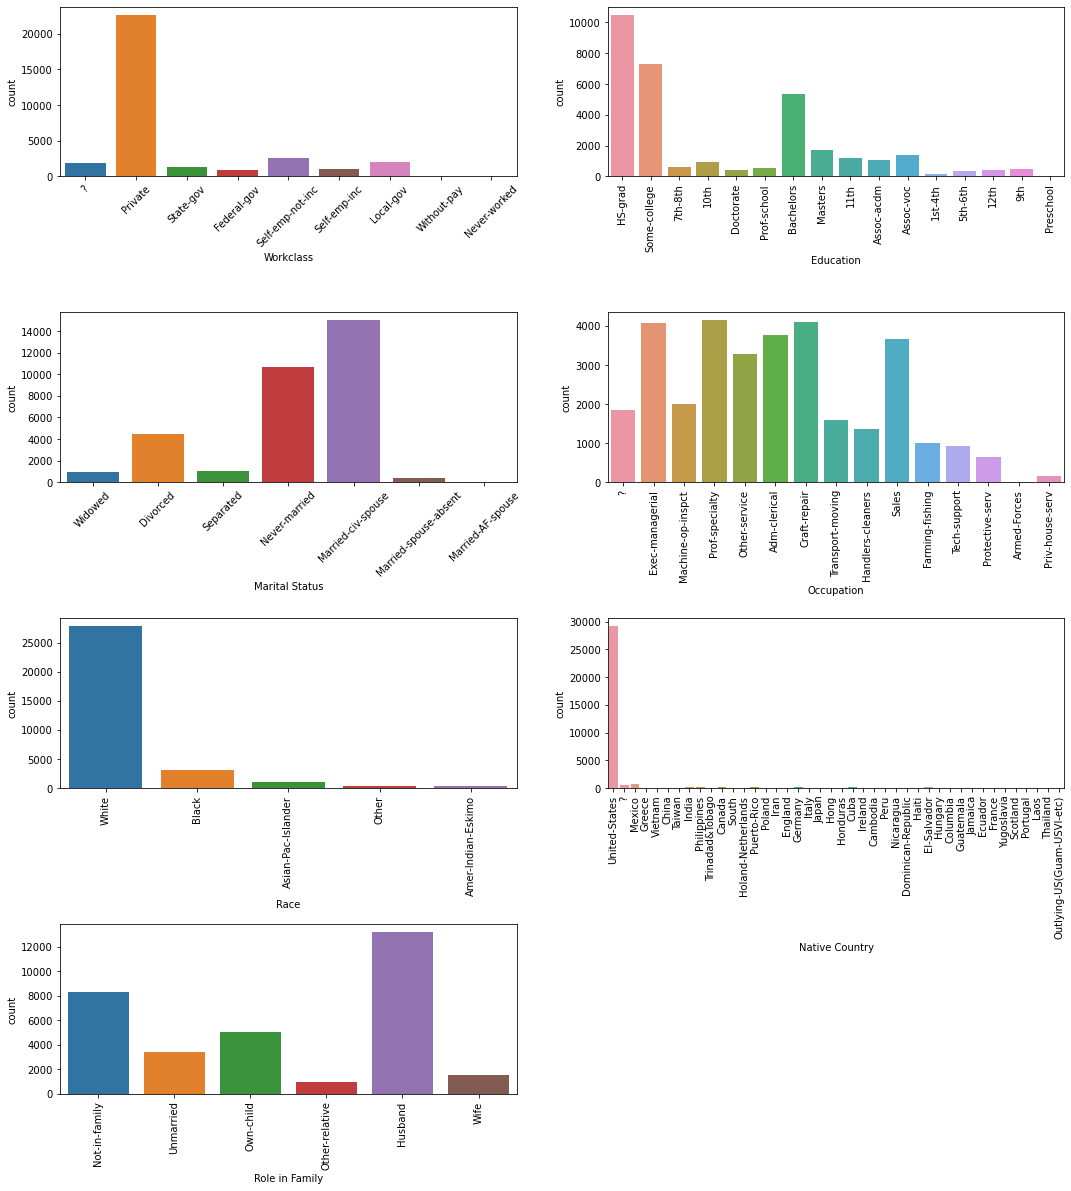

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(18,20))
fig.delaxes(ax8)

sns.countplot(df['Workclass'], ax = ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.subplots_adjust(hspace = 0.35)

sns.countplot(df['Education'], ax = ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.subplots_adjust(hspace = 0.5)

sns.countplot(df['Marital Status'], ax = ax3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

sns.countplot(df['Occupation'], ax = ax4)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=90)
plt.subplots_adjust(hspace = 0.8)

sns.countplot(df['Race'], ax = ax5)
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=90)

sns.countplot(df['Native Country'], ax = ax6)
plt.setp(ax6.xaxis.get_majorticklabels(), rotation=90)

sns.countplot(df['Role in Family'], ax = ax7)
plt.setp(ax7.xaxis.get_majorticklabels(), rotation=90)

plt.show()

Let's do some tidying in each feature.

In [10]:
#Categorize Workclass Feature
df.replace(dict.fromkeys(['Self-emp-not-inc','Self-emp-inc'], 'Self-Employed'), inplace = True)
df.replace(dict.fromkeys(['Local-gov', 'State-gov', 'Federal-gov'], 'Government'), inplace = True)
df.replace(dict.fromkeys(['Without-pay', 'Never-worked'], 'Other'), inplace = True)

In [11]:
#Categorize Education Feature
df.replace(dict.fromkeys(['1st-4th', '5th-6th'], 'Elementary-School'), inplace = True)
df.replace(dict.fromkeys(['7th-8th', '9th'], 'Middle-School'), inplace = True)
df.replace(dict.fromkeys(['10th', '11th', '12th'], 'High-School'), inplace = True)

In [12]:
#Categorize Marital Status
df.replace(dict.fromkeys(['Never-married'], 'Single'), inplace = True)
df.replace(dict.fromkeys(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married'), inplace = True)

From Line 8, It seems that there is no missing values. But from line 3 of this notebook, it shows that there is a data point which contains '?' character. Let's replace this with null value for further analysis.

In [13]:
df[df == '?'] = np.nan

In [14]:
kolom_desc = ['Feature Name', 'Feature Type', 'Null Count', 'Null Percentage', 'Unique Data', 'Unique Data Sample']
list_desc = []
for i in df.columns:
    list_desc.append([i,
                      df[i].dtype,
                      df[i].isna().sum(),
                      round((df[i].isna().sum()/len(df[i]))*100,2),
                      df[i].nunique(),
                      list(df[i].drop_duplicates().sample(2, replace = True).values)
                     ])
df_desc = pd.DataFrame(columns = kolom_desc, data = list_desc)
df_desc

,Feature Name,Feature Type,Null Count,Null Percentage,Unique Data,Unique Data Sample
0,Age,int64,0,0.00,73,"[66, 38]"
1,Workclass,object,1836,5.64,4,"[nan, Other]"
2,Final Weight,int64,0,0.00,21648,"[216475, 162852]"
3,Education,object,0,0.00,12,"[Doctorate, Elementary-School]"
4,Years of Education,int64,0,0.00,16,"[2, 3]"
5,Marital Status,object,0,0.00,5,"[Separated, Single]"
6,Occupation,object,1843,5.66,14,"[Farming-fishing, Other-service]"
7,Role in Family,object,0,0.00,6,"[Own-child, Other-relative]"
8,Race,object,0,0.00,5,"[Black, White]"
9,Gender,object,0,0.00,2,"[Female, Male]"


After we convert '?' character into nan value, it shows that there is null values within the dataset. Let's do some cleaning.

## Cleaning Values

### Cleaning Null Values - 'Occupation' Feature

To fill 'Workclass' feature, first we have to find out what occupation it is for each unit. So we treat null values in 'Occupation' feature first.

In [15]:
df_null_occu = df[df['Occupation'].isna() == True]
df_null_occu[df_null_occu['Workclass'].isna() == False]

,Age,Workclass,Final Weight,Education,Years of Education,Marital Status,Occupation,Role in Family,Race,Gender,Capital Gain,Capital Loss,Workhours per Week,Native Country,Income
8874,18,Other,206359,High-School,6,Single,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
13675,23,Other,188535,Middle-School,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
17089,17,Other,237272,High-School,6,Single,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
21934,18,Other,157131,High-School,7,Single,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
24483,20,Other,462294,Some-college,10,Single,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32331,30,Other,176673,HS-grad,9,Married,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32338,18,Other,153663,Some-college,10,Single,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


We find out that there is a 'Never-worked' category in 'Workclass' feature. So for this case, let's fill the null value for this category with 'Unemployed'.

In [16]:
def unemployed (x):
    if x['Workclass'] == 'Never-worked':
        return 'Unemployed'
    else :
        return x['Occupation']
df['Occupation'] = df[['Workclass', 'Occupation']].apply(unemployed, axis = 1)

In [17]:
df[df['Occupation'].isna() == True]['Education'].value_counts()

HS-grad              533
Some-college         516
High-School          261
Bachelors            173
Middle-School        124
Assoc-voc             61
Masters               48
Assoc-acdm            47
Elementary-School     42
Prof-school           18
Doctorate             15
Preschool              5
Name: Education, dtype: int64

In [18]:
df[df['Occupation'].isna() == False]['Occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: Occupation, dtype: int64

To treat null value in 'Occupation' feature, I think it is logical if we first use 'Education' feature as our basis in treating null value.

#### HS-grad

In [19]:
df_null_occu[df_null_occu['Education'] == 'HS-grad']

,Age,Workclass,Final Weight,Education,Years of Education,Marital Status,Occupation,Role in Family,Race,Gender,Capital Gain,Capital Loss,Workhours per Week,Native Country,Income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
24,61,NaN,135285,HS-grad,9,Married,NaN,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,NaN,100820,HS-grad,9,Married,NaN,Husband,White,Male,0,2489,15,United-States,<=50K
202,65,NaN,143118,HS-grad,9,Widowed,NaN,Unmarried,White,Female,0,2206,10,United-States,<=50K
213,63,NaN,234083,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,2205,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32366,66,NaN,93318,HS-grad,9,Widowed,NaN,Unmarried,White,Female,0,0,40,United-States,<=50K
32440,20,NaN,203992,HS-grad,9,Single,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
32500,82,NaN,403910,HS-grad,9,Single,NaN,Not-in-family,White,Male,0,0,3,United-States,<=50K
32543,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Let's use the non null dataframe as a reference to find a pattern.

I think from the available features, we can find a pattern from 'Age' and 'Workhours per Week' which is filtered by 'Education' and 'Income' Feature.
- 'Workclass' feature is a represantion of 'Occupation' feature which we are trying to treat its null value.
- 'Final Weight' is cencus indicator, does not really affect to 'Occupation' as it is very random.
- 'Years of Education' is correlated to 'Education' Feature, already included in our analysis.
- We can not really use Categorical Features such as 'Marital Status', 'Role in Family', 'Race', 'Gender', and 'Native Country'.
- As for 'Capital Gain' and 'Capital Loss', They show income from other investment sources than basic wage/salary. It is a personal preference whether we want to invest and gain another income other than the basic salary. So it does not really represent certain 'Occupation'.

In [20]:
df_b = df[df['Occupation'].isna() == False][df['Income'] == '>50K'][df['Education'] == 'HS-grad']
df_b.head()

,Age,Workclass,Final Weight,Education,Years of Education,Marital Status,Occupation,Role in Family,Race,Gender,Capital Gain,Capital Loss,Workhours per Week,Native Country,Income
34,60,Self-Employed,205246,HS-grad,9,Single,Exec-managerial,Not-in-family,Black,Male,0,2559,50,United-States,>50K
36,53,Private,149650,HS-grad,9,Single,Sales,Not-in-family,White,Male,0,2559,48,United-States,>50K
51,50,Private,237729,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,2444,72,United-States,>50K
71,47,Self-Employed,145290,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,2415,50,United-States,>50K
94,31,Self-Employed,252752,HS-grad,9,Married,Other-service,Wife,White,Female,0,2415,40,United-States,>50K


In [21]:
df_b['Occupation'].value_counts()

Craft-repair         405
Exec-managerial      261
Sales                200
Transport-moving     168
Adm-clerical         163
Machine-op-inspct    139
Prof-specialty        60
Other-service         53
Tech-support          47
Protective-serv       47
Farming-fishing       47
Handlers-cleaners     38
Name: Occupation, dtype: int64

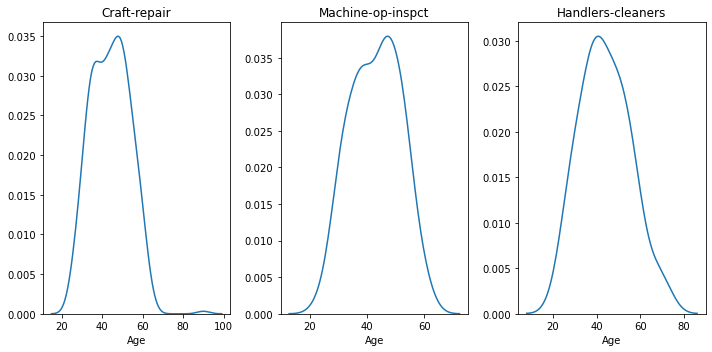

In [22]:
#Age Distribution in Various Occupations on Dataframe B (Education = HS-grad, Income = >50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Craft-repair')
sns.distplot (df_b[df_b['Occupation'] == 'Craft-repair']['Age'], hist = False, ax = ax1)

ax2.set_title('Machine-op-inspct')
sns.distplot (df_b[df_b['Occupation'] == 'Machine-op-inspct']['Age'], hist = False, ax = ax2)

ax3.set_title('Handlers-cleaners')
sns.distplot (df_b[df_b['Occupation'] == 'Handlers-cleaners']['Age'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

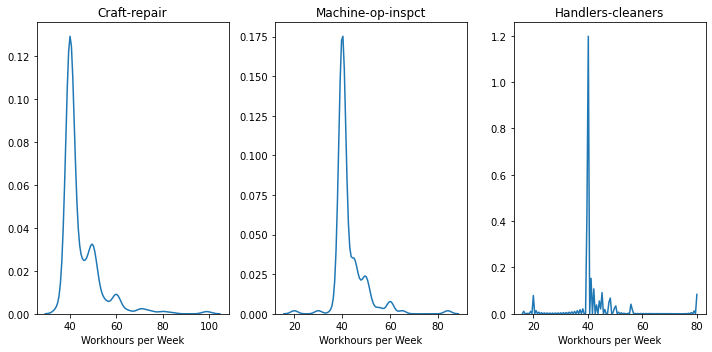

In [23]:
#Workhours per Week Distribution in Various Occupations on Dataframe B (Education = HS-grad, Income = >50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Craft-repair')
sns.distplot (df_b[df_b['Occupation'] == 'Craft-repair']['Workhours per Week'], hist = False, ax = ax1)

ax2.set_title('Machine-op-inspct')
sns.distplot (df_b[df_b['Occupation'] == 'Machine-op-inspct']['Workhours per Week'], hist = False, ax = ax2)

ax3.set_title('Handlers-cleaners')
sns.distplot (df_b[df_b['Occupation'] == 'Handlers-cleaners']['Workhours per Week'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

In [24]:
df_c = df[df['Occupation'].isna() == False][df['Income'] == '<=50K'][df['Education'] == 'HS-grad']
df_c.head()

,Age,Workclass,Final Weight,Education,Years of Education,Marital Status,Occupation,Role in Family,Race,Gender,Capital Gain,Capital Loss,Workhours per Week,Native Country,Income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
8,68,Government,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
22,61,Private,29059,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,2754,25,United-States,<=50K
46,71,Private,110380,HS-grad,9,Married,Sales,Husband,White,Male,0,2467,52,United-States,<=50K


In [25]:
df_c['Occupation'].value_counts()

Craft-repair         1515
Other-service        1226
Adm-clerical         1202
Machine-op-inspct     882
Sales                 869
Transport-moving      657
Handlers-cleaners     573
Exec-managerial       546
Farming-fishing       356
Prof-specialty        173
Protective-serv       168
Tech-support          112
Priv-house-serv        50
Armed-Forces            4
Name: Occupation, dtype: int64

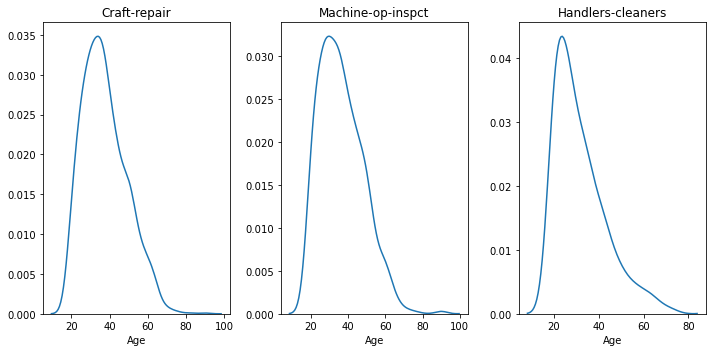

In [26]:
#Age Distribution in Various Occupations on Dataframe C (Education = HS-grad, Income = <=50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Craft-repair')
sns.distplot (df_c[df_c['Occupation'] == 'Craft-repair']['Age'], hist = False, ax = ax1)

ax2.set_title('Machine-op-inspct')
sns.distplot (df_c[df_c['Occupation'] == 'Machine-op-inspct']['Age'], hist = False, ax = ax2)

ax3.set_title('Handlers-cleaners')
sns.distplot (df_c[df_c['Occupation'] == 'Handlers-cleaners']['Age'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

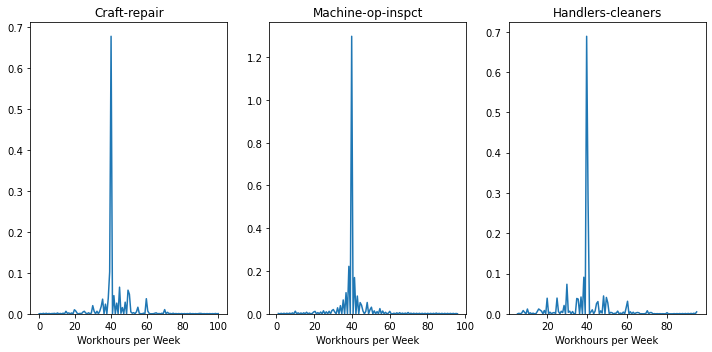

In [27]:
#Workhours per Week Distribution in Various Occupations on Dataframe C (Education = HS-grad, Income = <=50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Craft-repair')
sns.distplot (df_c[df_c['Occupation'] == 'Craft-repair']['Workhours per Week'], hist = False, ax = ax1)

ax2.set_title('Machine-op-inspct')
sns.distplot (df_c[df_c['Occupation'] == 'Machine-op-inspct']['Workhours per Week'], hist = False, ax = ax2)

ax3.set_title('Handlers-cleaners')
sns.distplot (df_c[df_c['Occupation'] == 'Handlers-cleaners']['Workhours per Week'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

From graphs above, it seems that there is no particular pattern to for each 'Occupation' that is filtered by 'Education' and 'Income'. So I think it is wise to fill the null-values in 'Occupation' feature for 'HS-grad' education with its most frequent value to both Income category which is 'Craft-repair'.

In [28]:
def hs_grad (x):
    if x['Occupation'] is np.nan and x['Education'] == 'HS-grad':
        return 'Craft-repair'
    else :
        return x['Occupation']
df['Occupation'] = df[['Education', 'Occupation']].apply(hs_grad, axis = 1)

#### Some-College

In [29]:
df_d = df[df['Occupation'].isna() == False][df['Income'] == '>50K'][df['Education'] == 'Some-college']
df_d['Occupation'].value_counts()

Exec-managerial      312
Craft-repair         241
Sales                214
Adm-clerical         142
Prof-specialty       116
Tech-support          75
Transport-moving      73
Protective-serv       69
Machine-op-inspct     44
Other-service         26
Farming-fishing       20
Handlers-cleaners     19
Name: Occupation, dtype: int64

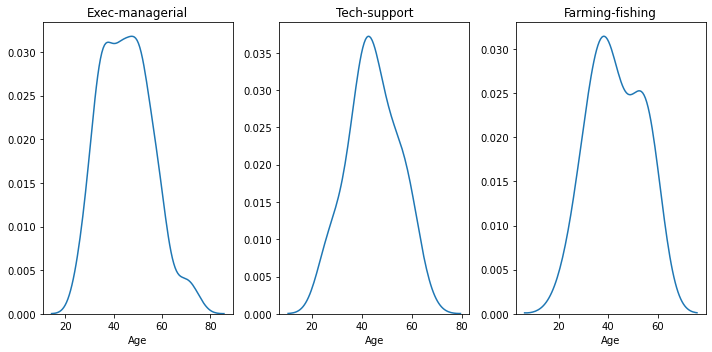

In [30]:
#Age Distribution in Various Occupations on Dataframe D (Education = Some-college, Income = >50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Exec-managerial')
sns.distplot (df_d[df_d['Occupation'] == 'Exec-managerial']['Age'], hist = False, ax = ax1)

ax2.set_title('Tech-support')
sns.distplot (df_d[df_d['Occupation'] == 'Tech-support']['Age'], hist = False, ax = ax2)

ax3.set_title('Farming-fishing')
sns.distplot (df_d[df_d['Occupation'] == 'Farming-fishing']['Age'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

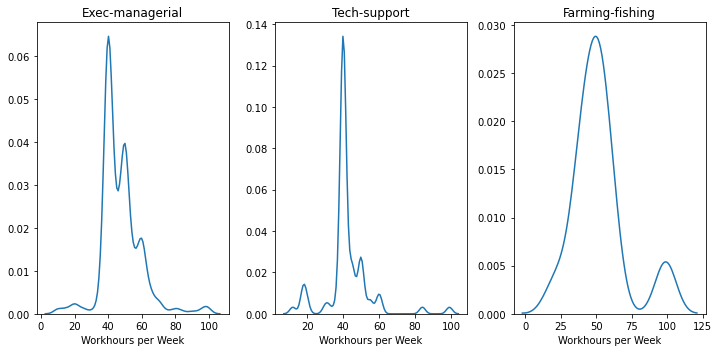

In [31]:
#Workhours per week Distribution in Various Occupations on Dataframe D (Education = Some-college, Income = >50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Exec-managerial')
sns.distplot (df_d[df_d['Occupation'] == 'Exec-managerial']['Workhours per Week'], hist = False, ax = ax1)

ax2.set_title('Tech-support')
sns.distplot (df_d[df_d['Occupation'] == 'Tech-support']['Workhours per Week'], hist = False, ax = ax2)

ax3.set_title('Farming-fishing')
sns.distplot (df_d[df_d['Occupation'] == 'Farming-fishing']['Workhours per Week'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

In [32]:
df_e = df[df['Occupation'].isna() == False][df['Income'] == '<=50K'][df['Education'] == 'Some-college']
df_e['Occupation'].value_counts()

Adm-clerical         1137
Sales                 795
Other-service         753
Craft-repair          626
Exec-managerial       566
Prof-specialty        312
Machine-op-inspct     266
Handlers-cleaners     248
Transport-moving      210
Tech-support          197
Farming-fishing       154
Protective-serv       133
Priv-house-serv        16
Armed-Forces            2
Name: Occupation, dtype: int64

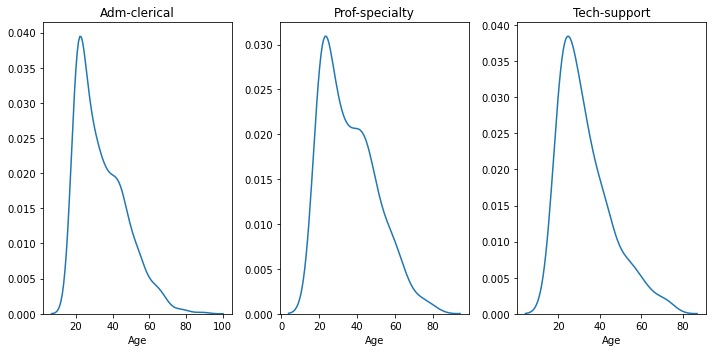

In [33]:
#Age Distribution in Various Occupations on Dataframe E (Education = Some-college, Income = <=50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Adm-clerical')
sns.distplot (df_e[df_e['Occupation'] == 'Adm-clerical']['Age'], hist = False, ax = ax1)

ax2.set_title('Prof-specialty')
sns.distplot (df_e[df_e['Occupation'] == 'Prof-specialty']['Age'], hist = False, ax = ax2)

ax3.set_title('Tech-support')
sns.distplot (df_e[df_e['Occupation'] == 'Tech-support']['Age'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

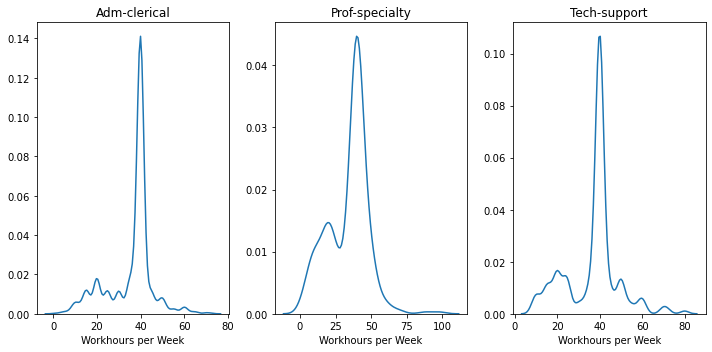

In [34]:
#Workhours per Week Distribution in Various Occupations on Dataframe E (Education = Some-college, Income = <=50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Adm-clerical')
sns.distplot (df_e[df_e['Occupation'] == 'Adm-clerical']['Workhours per Week'], hist = False, ax = ax1)

ax2.set_title('Prof-specialty')
sns.distplot (df_e[df_e['Occupation'] == 'Prof-specialty']['Workhours per Week'], hist = False, ax = ax2)

ax3.set_title('Tech-support')
sns.distplot (df_e[df_e['Occupation'] == 'Tech-support']['Workhours per Week'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

Same as 'HS-grad', we can't really use a pattern from graphs above. We can use the same method as 'HS-grad' above, but for 'Income' >50K, we use 'Exec-managerial' as our filler and 'Adm-clerical' for 'Income' <=50K.

In [35]:
def some_college (x):
    if x['Occupation'] is np.nan and x['Education'] == 'Some-college' and x['Income'] == '>50K':
        return 'Exec-managerial'
    elif x['Occupation'] is np.nan and x['Education'] == 'Some-college' and x['Income'] == '<=50K':
        return 'Adm-clerical'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(some_college, axis = 1)

#### Bachelors

In [36]:
df_f = df[df['Occupation'].isna() == False][df['Income'] == '>50K'][df['Education'] == 'Bachelors']
df_f['Occupation'].value_counts()

Exec-managerial      779
Prof-specialty       579
Sales                382
Adm-clerical         119
Craft-repair          88
Tech-support          78
Protective-serv       56
Other-service         29
Farming-fishing       21
Machine-op-inspct     18
Transport-moving      15
Handlers-cleaners     11
Priv-house-serv        1
Name: Occupation, dtype: int64

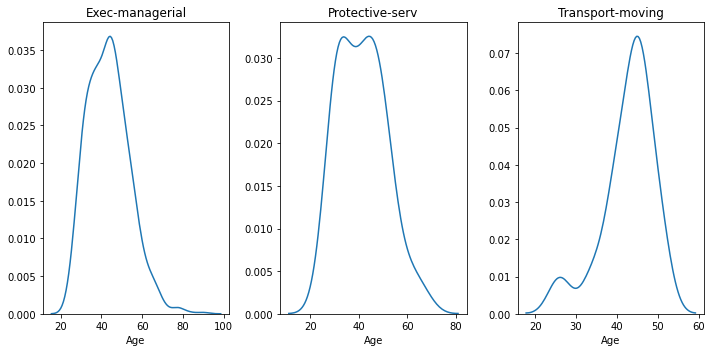

In [37]:
#Age Distribution in Various Occupations on Dataframe F (Education = Bachelors, Income = >50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Exec-managerial')
sns.distplot (df_f[df_f['Occupation'] == 'Exec-managerial']['Age'], hist = False, ax = ax1)

ax2.set_title('Protective-serv')
sns.distplot (df_f[df_f['Occupation'] == 'Protective-serv']['Age'], hist = False, ax = ax2)

ax3.set_title('Transport-moving')
sns.distplot (df_f[df_f['Occupation'] == 'Transport-moving']['Age'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

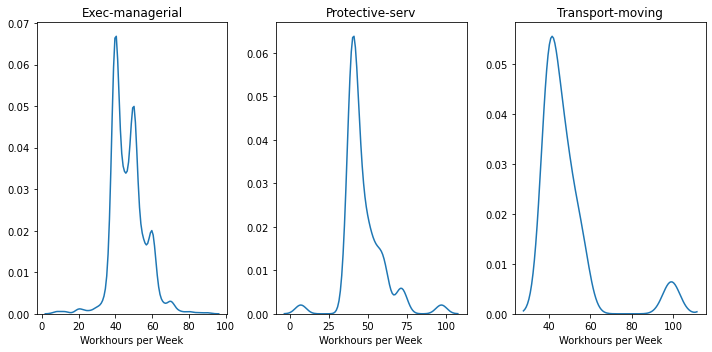

In [38]:
#Workhours per week Distribution in Various Occupations on Dataframe F (Education = Bachelors, Income = >50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Exec-managerial')
sns.distplot (df_f[df_f['Occupation'] == 'Exec-managerial']['Workhours per Week'], hist = False, ax = ax1)

ax2.set_title('Protective-serv')
sns.distplot (df_f[df_f['Occupation'] == 'Protective-serv']['Workhours per Week'], hist = False, ax = ax2)

ax3.set_title('Transport-moving')
sns.distplot (df_f[df_f['Occupation'] == 'Transport-moving']['Workhours per Week'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

In [39]:
df_g = df[df['Occupation'].isna() == False][df['Income'] == '<=50K'][df['Education'] == 'Bachelors']
df_g['Occupation'].value_counts()

Prof-specialty       915
Exec-managerial      590
Sales                427
Adm-clerical         387
Other-service        152
Tech-support         152
Craft-repair         137
Farming-fishing       56
Machine-op-inspct     51
Transport-moving      47
Protective-serv       44
Handlers-cleaners     39
Priv-house-serv        6
Armed-Forces           1
Name: Occupation, dtype: int64

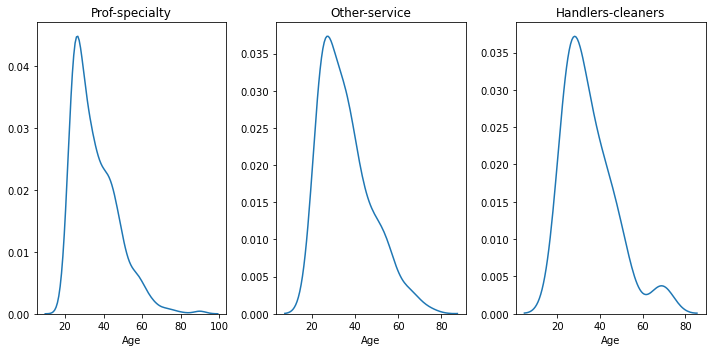

In [40]:
#Age Distribution in Various Occupations on Dataframe G(Education = Bachelors, Income = <=50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Prof-specialty')
sns.distplot (df_g[df_g['Occupation'] == 'Prof-specialty']['Age'], hist = False, ax = ax1)

ax2.set_title('Other-service')
sns.distplot (df_g[df_g['Occupation'] == 'Other-service']['Age'], hist = False, ax = ax2)

ax3.set_title('Handlers-cleaners')
sns.distplot (df_g[df_g['Occupation'] == 'Handlers-cleaners']['Age'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

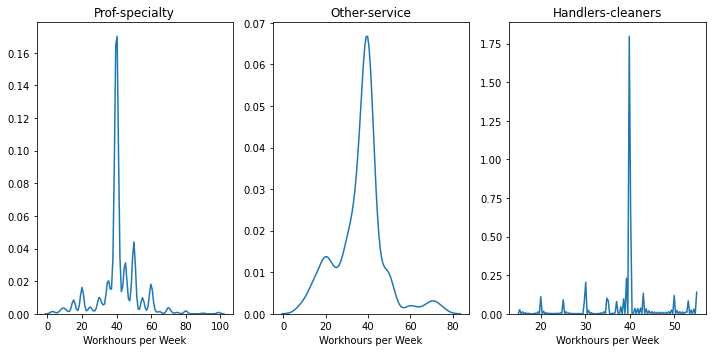

In [41]:
#Workhours per week Distribution in Various Occupations on Dataframe G(Education = Bachelors, Income = <=50K)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.set_title('Prof-specialty')
sns.distplot (df_g[df_g['Occupation'] == 'Prof-specialty']['Workhours per Week'], hist = False, ax = ax1)

ax2.set_title('Other-service')
sns.distplot (df_g[df_g['Occupation'] == 'Other-service']['Workhours per Week'], hist = False, ax = ax2)

ax3.set_title('Handlers-cleaners')
sns.distplot (df_g[df_g['Occupation'] == 'Handlers-cleaners']['Workhours per Week'], hist = False, ax = ax3)

plt.tight_layout()
plt.show ()

Same as previous treatments, we can't really use a pattern from graphs above. We can use the same method as above, but for 'Income' >50K, we use 'Exec-managerial' as our filler and 'Prof-specialty' for 'Income' <=50K.


In [42]:
def bachelors (x):
    if x['Occupation'] is np.nan and x['Education'] == 'Bachelors' and x['Income'] == '>50K':
        return 'Exec-managerial'
    elif x['Occupation'] is np.nan and x['Education'] == 'Bachelors' and x['Income'] == '<=50K':
        return 'Prof-specialty'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(bachelors, axis = 1)

#### Others

From 3 experiments above, it seems that all data has no particular pattern set by 'Age' and 'Workhours per week'. So for the rest of 'Education' feature, I am going to use the most frequent 'Occupation' value filtered by 'Income' to fill the null values.

In [43]:
df[df['Occupation'].isna() == False][df['Education'] == 'High-School'][df['Income'] == '>50K']['Occupation'].mode()[0]

'Craft-repair'

In [44]:
df[df['Occupation'].isna() == False][df['Education'] == 'High-School'][df['Income'] == '<=50K']['Occupation'].mode()[0]

'Other-service'

In [45]:
def high_school (x):
    if x['Occupation'] is np.nan and x['Education'] == 'High-School' and x['Income'] == '>50K':
        return 'Craft-repair'
    elif x['Occupation'] is np.nan and x['Education'] == 'High-School' and x['Income'] == '<=50K':
        return 'Other-service'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(high_school, axis = 1)

In [46]:
df[df['Occupation'].isna() == False][df['Education'] == 'Middle-School'][df['Income'] == '>50K']['Occupation'].mode()[0]

'Craft-repair'

In [47]:
df[df['Occupation'].isna() == False][df['Education'] == 'Middle-School'][df['Income'] == '<=50K']['Occupation'].mode()[0]

'Craft-repair'

In [48]:
def middle_school (x):
    if x['Occupation'] is np.nan and x['Education'] == 'Middle-School' and x['Income'] == '>50K':
        return 'Craft-repair'
    elif x['Occupation'] is np.nan and x['Education'] == 'Middle-School' and x['Income'] == '<=50K':
        return 'Craft-repair'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(middle_school, axis = 1)

In [49]:
df[df['Occupation'].isna() == False][df['Education'] == 'Assoc-voc'][df['Income'] == '>50K']['Occupation'].mode()[0]

'Craft-repair'

In [50]:
df[df['Occupation'].isna() == False][df['Education'] == 'Assoc-voc'][df['Income'] == '<=50K']['Occupation'].mode()[0]

'Craft-repair'

In [51]:
def assoc_voc (x):
    if x['Occupation'] is np.nan and x['Education'] == 'Assoc-voc' and x['Income'] == '>50K':
        return 'Craft-repair'
    elif x['Occupation'] is np.nan and x['Education'] == 'Assoc-voc' and x['Income'] == '<=50K':
        return 'Craft-repair'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(assoc_voc, axis = 1)

In [52]:
df[df['Occupation'].isna() == False][df['Education'] == 'Masters'][df['Income'] == '>50K']['Occupation'].mode()[0]

'Prof-specialty'

In [53]:
df[df['Occupation'].isna() == False][df['Education'] == 'Masters'][df['Income'] == '<=50K']['Occupation'].mode()[0]

'Prof-specialty'

In [54]:
def masters (x):
    if x['Occupation'] is np.nan and x['Education'] == 'Masters' and x['Income'] == '>50K':
        return 'Prof-specialty'
    elif x['Occupation'] is np.nan and x['Education'] == 'Masters' and x['Income'] == '<=50K':
        return 'Prof-specialty'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(masters, axis = 1)

In [55]:
df[df['Occupation'].isna() == False][df['Education'] == 'Assoc-acdm'][df['Income'] == '>50K']['Occupation'].mode()[0]

'Exec-managerial'

In [56]:
df[df['Occupation'].isna() == False][df['Education'] == 'Assoc-acdm'][df['Income'] == '<=50K']['Occupation'].mode()[0]

'Adm-clerical'

In [57]:
def assoc_acdm (x):
    if x['Occupation'] is np.nan and x['Education'] == 'Assoc-acdm' and x['Income'] == '>50K':
        return 'Exec-managerial'
    elif x['Occupation'] is np.nan and x['Education'] == 'Assoc-acdm' and x['Income'] == '<=50K':
        return 'Adm-clerical'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(assoc_acdm, axis = 1)

In [58]:
df[df['Occupation'].isna() == False][df['Education'] == 'Elementary-School'][df['Income'] == '>50K']['Occupation'].mode()[0]

'Craft-repair'

In [59]:
df[df['Occupation'].isna() == False][df['Education'] == 'Elementary-School'][df['Income'] == '<=50K']['Occupation'].mode()[0]

'Other-service'

In [60]:
def elem_school (x):
    if x['Occupation'] is np.nan and x['Education'] == 'Elementary-School' and x['Income'] == '>50K':
        return 'Craft-repair'
    elif x['Occupation'] is np.nan and x['Education'] == 'Elementary-School' and x['Income'] == '<=50K':
        return 'Other-service'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(elem_school, axis = 1)

In [61]:
df[df['Occupation'].isna() == False][df['Education'] == 'Prof-school'][df['Income'] == '>50K']['Occupation'].mode()[0]

'Prof-specialty'

In [62]:
df[df['Occupation'].isna() == False][df['Education'] == 'Prof-school'][df['Income'] == '<=50K']['Occupation'].mode()[0]

'Prof-specialty'

In [63]:
def prof_spec (x):
    if x['Occupation'] is np.nan and x['Education'] == 'Prof-school' and x['Income'] == '>50K':
        return 'Prof-specialty'
    elif x['Occupation'] is np.nan and x['Education'] == 'Prof-school' and x['Income'] == '<=50K':
        return 'Prof-specialty'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(prof_spec, axis = 1)

In [64]:
df[df['Occupation'].isna() == False][df['Education'] == 'Doctorate'][df['Income'] == '>50K']['Occupation'].mode()[0]

'Prof-specialty'

In [65]:
df[df['Occupation'].isna() == False][df['Education'] == 'Doctorate'][df['Income'] == '<=50K']['Occupation'].mode()[0]

'Prof-specialty'

In [66]:
def doctorate (x):
    if x['Occupation'] is np.nan and x['Education'] == 'Doctorate' and x['Income'] == '>50K':
        return 'Prof-specialty'
    elif x['Occupation'] is np.nan and x['Education'] == 'Doctorate' and x['Income'] == '<=50K':
        return 'Prof-specialty'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(doctorate, axis = 1)

In [67]:
df[df['Occupation'].isna() == False][df['Education'] == 'Preschool'][df['Income'] == '<=50K']['Occupation'].mode()[0]

'Other-service'

In [68]:
def preschool (x):
    if x['Occupation'] is np.nan and x['Education'] == 'Preschool' and x['Income'] == '>50K':
        return 'Other-service'
    elif x['Occupation'] is np.nan and x['Education'] == 'Preschool' and x['Income'] == '<=50K':
        return 'Other-service'
    else:
        return x['Occupation']
    
df['Occupation'] = df[['Income', 'Education', 'Occupation']].apply(preschool, axis = 1)

In [69]:
df['Occupation'].isna().sum()

0

There is no more Null Values in 'Occupation' Feature.

### Cleaning Null Values - 'Workclass' Feature

In [70]:
df_nnull = df[df['Workclass'].isna() == False]

In [71]:
df_nnull[df_nnull['Income'] == '>50K'].groupby(['Workclass', 'Occupation']).size()

Workclass      Occupation       
Government     Adm-clerical          161
               Armed-Forces            1
               Craft-repair           75
               Exec-managerial       275
               Farming-fishing         6
               Handlers-cleaners      10
               Machine-op-inspct       9
               Other-service          19
               Prof-specialty        520
               Protective-serv       178
               Sales                  11
               Tech-support           49
               Transport-moving       27
Private        Adm-clerical          321
               Craft-repair          721
               Exec-managerial      1295
               Farming-fishing        30
               Handlers-cleaners      73
               Machine-op-inspct     224
               Other-service         100
               Priv-house-serv         1
               Prof-specialty       1007
               Protective-serv        30
               Sales    

In [72]:
df_nnull[df_nnull['Income'] == '<=50K'].groupby(['Workclass', 'Occupation']).size()

Workclass      Occupation       
Government     Adm-clerical          692
               Armed-Forces            8
               Craft-repair          191
               Exec-managerial       308
               Farming-fishing        46
               Handlers-cleaners      69
               Machine-op-inspct      30
               Other-service         333
               Prof-specialty        774
               Protective-serv       270
               Sales                  21
               Tech-support          114
               Transport-moving      154
Other          Adm-clerical            5
               Craft-repair            3
               Farming-fishing         6
               Handlers-cleaners       1
               Machine-op-inspct       1
               Other-service           4
               Transport-moving        1
Private        Adm-clerical         2510
               Craft-repair         2470
               Exec-managerial      1395
               Farming-f

Let's do a similar method to fill null values as Cleaning Values in 'Occupation' Feature in Workclass feature.

In [73]:
df[df['Workclass'].isna() == True]['Occupation'].value_counts()

Craft-repair       722
Adm-clerical       520
Other-service      299
Prof-specialty     209
Exec-managerial     86
Name: Occupation, dtype: int64

In [74]:
df[df['Workclass'].isna() == True][df['Income'] == '>50K']['Occupation'].value_counts()

Exec-managerial    86
Craft-repair       68
Prof-specialty     37
Name: Occupation, dtype: int64

In [75]:
df[df['Workclass'].isna() == True][df['Income'] == '<=50K']['Occupation'].value_counts()

Craft-repair      654
Adm-clerical      520
Other-service     299
Prof-specialty    172
Name: Occupation, dtype: int64

In [76]:
def fill_workclass (x):
    if x['Workclass'] is np.nan and x['Occupation'] == 'Exec-managerial' and x['Income'] == '>50K':
        return 'Private'
    elif x['Workclass'] is np.nan and x['Occupation'] == 'Craft-repair' and x['Income'] == '>50K':
        return 'Private'
    elif x['Workclass'] is np.nan and x['Occupation'] == 'Prof-specialty' and x['Income'] == '>50K':
        return 'Private'
    elif x['Workclass'] is np.nan and x['Occupation'] == 'Craft-repair' and x['Income'] == '<=50K':
        return 'Private'
    elif x['Workclass'] is np.nan and x['Occupation'] == 'Adm-clerical' and x['Income'] == '<=50K':
        return 'Private'
    elif x['Workclass'] is np.nan and x['Occupation'] == 'Other-service' and x['Income'] == '<=50K':
        return 'Private'
    elif x['Workclass'] is np.nan and x['Occupation'] == 'Prof-specialty' and x['Income'] == '<=50K':
        return 'Private'
    else :
        return x['Workclass']
    
df['Workclass'] = df[['Income', 'Occupation', 'Workclass']].apply(fill_workclass, axis = 1)

In [77]:
df['Workclass'].isna().sum()

0

There is no more null values in 'Workclass' Feature.

### Cleaning Null Values - 'Native Country'

In [78]:
df[df['Native Country'].isna() == True].head()

,Age,Workclass,Final Weight,Education,Years of Education,Marital Status,Occupation,Role in Family,Race,Gender,Capital Gain,Capital Loss,Workhours per Week,Native Country,Income
9,41,Private,70037,Some-college,10,Single,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
18,22,Private,119592,Assoc-acdm,12,Single,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K
65,60,Self-Employed,226355,Assoc-voc,11,Married,Machine-op-inspct,Husband,White,Male,0,2415,70,NaN,>50K
86,39,Self-Employed,218490,Prof-school,15,Married,Prof-specialty,Husband,White,Male,0,2415,50,NaN,>50K
87,43,Government,156996,Prof-school,15,Married,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,NaN,>50K


In [79]:
df[df['Native Country'].isna() == False]['Native Country'].value_counts().head()

United-States    29153
Mexico             639
Philippines        198
Germany            137
Canada             121
Name: Native Country, dtype: int64

Because there is a high count observations between 'United-States' and other countries, let's just fill the null values in 'Native Country' with 'United-States'.

In [80]:
def fill_native (x):
    if x['Native Country'] is np.nan:
        return 'United-States'
    else :
        return x['Native Country']
    
df['Native Country'] = df[['Native Country']].apply(fill_native, axis = 1)

In [81]:
df['Native Country'].isna().sum()

0

In [82]:
df_native = pd.DataFrame(df['Native Country'].value_counts())

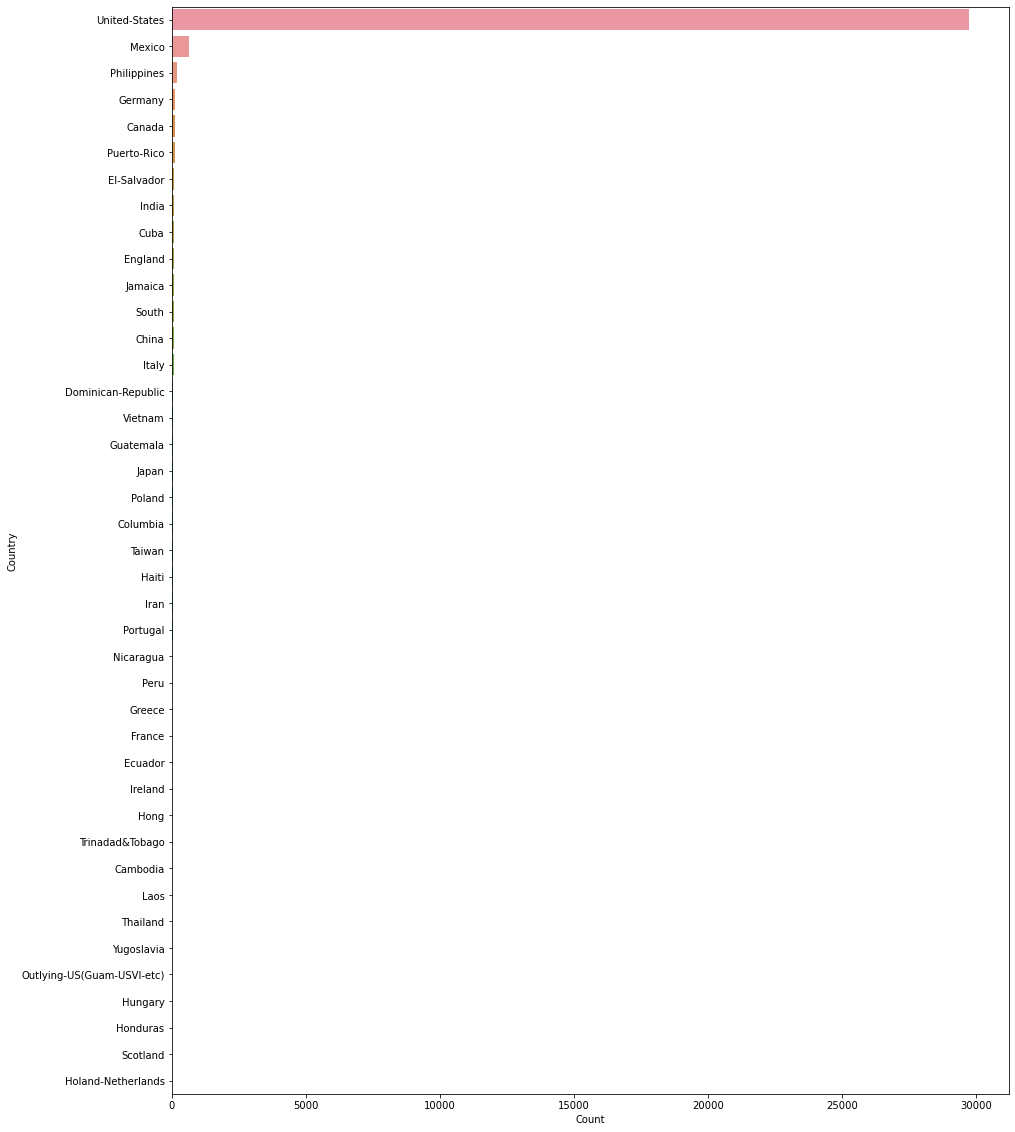

In [83]:
plt.figure(figsize=(15,20))
ax = sns.barplot(x = df_native['Native Country'], y = df_native.index, data = df_native)
ax.set(xlabel = 'Count', ylabel = 'Country')
plt.show()

I decide to categorize the non United States native country into one category because the sum of United States Country is uneven to other countries' distribution.

In [84]:
list_df_not_usa = list(df[df['Native Country'] != 'United-States']['Native Country'].values)

In [85]:
df['Native Country'].replace([list_df_not_usa], 'Outside-US', inplace=True)

In [86]:
kolom_desc = ['Feature Name', 'Feature Type', 'Null Count', 'Null Percentage', 'Unique Data', 'Unique Data Sample']
list_desc = []
for i in df.columns:
    list_desc.append([i,
                      df[i].dtype,
                      df[i].isna().sum(),
                      round((df[i].isna().sum()/len(df[i]))*100,2),
                      df[i].nunique(),
                      list(df[i].drop_duplicates().sample(2, replace = True).values)
                     ])
df_desc = pd.DataFrame(columns = kolom_desc, data = list_desc)
df_desc

,Feature Name,Feature Type,Null Count,Null Percentage,Unique Data,Unique Data Sample
0,Age,int64,0,0.0,73,"[42, 40]"
1,Workclass,object,0,0.0,4,"[Private, Government]"
2,Final Weight,int64,0,0.0,21648,"[166929, 54440]"
3,Education,object,0,0.0,12,"[Assoc-acdm, Masters]"
4,Years of Education,int64,0,0.0,16,"[11, 4]"
5,Marital Status,object,0,0.0,5,"[Single, Widowed]"
6,Occupation,object,0,0.0,14,"[Priv-house-serv, Machine-op-inspct]"
7,Role in Family,object,0,0.0,6,"[Not-in-family, Other-relative]"
8,Race,object,0,0.0,5,"[Black, White]"
9,Gender,object,0,0.0,2,"[Female, Male]"


In [87]:
print('This dataframe contains {} rows and {} columns after cleaning'.format(df.shape[0], df.shape[1]))

This dataframe contains 32537 rows and 15 columns after cleaning


In [88]:
# df.to_csv('Adult_Clean.csv')